# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
grocerySales_df = pd.read_csv('Wholesale_Data.csv')
grocerySales_df.head(10)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
7,2,3,7579,4956,9426,1669,3321,2566
8,1,3,5963,3648,6192,425,1716,750
9,2,3,6006,11093,18881,1159,7425,2098


In [133]:
# Checking for missing values
missing_values = grocerySales_df.isnull().sum()
print("Missing Values:")
print(missing_values) # Result displays no misiing value

# Summary statistics
grocerySales_df.describe()

Missing Values:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


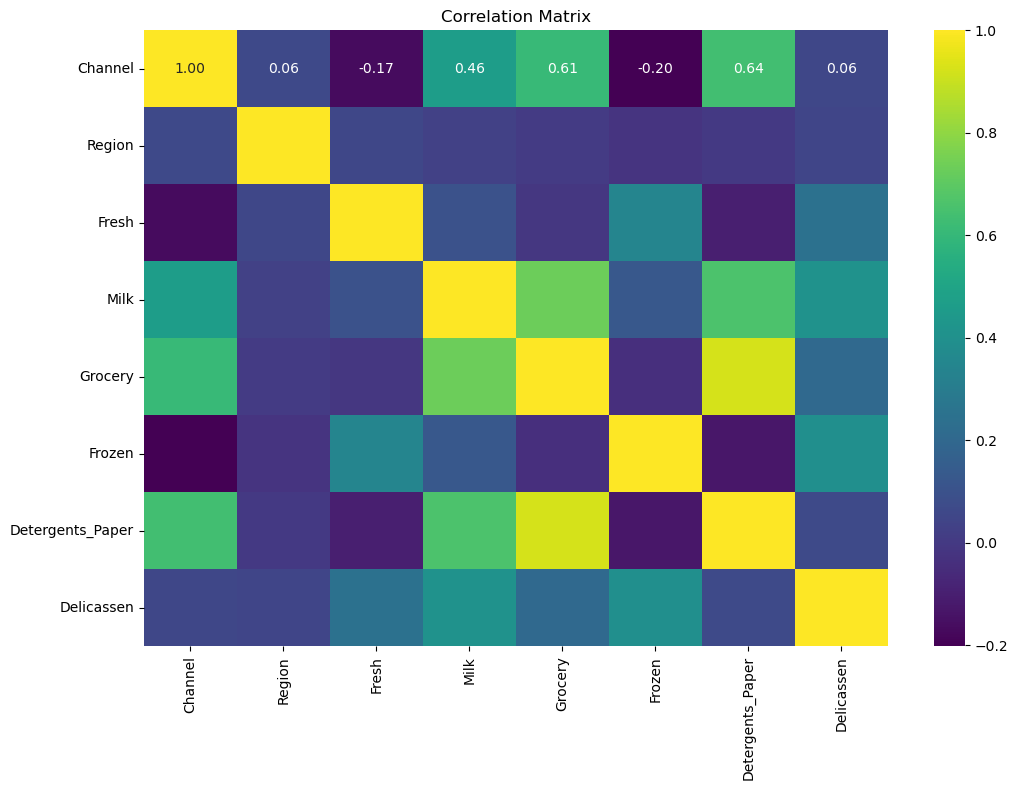

In [134]:
# Correlation matrix
correlation_matrix = grocerySales_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

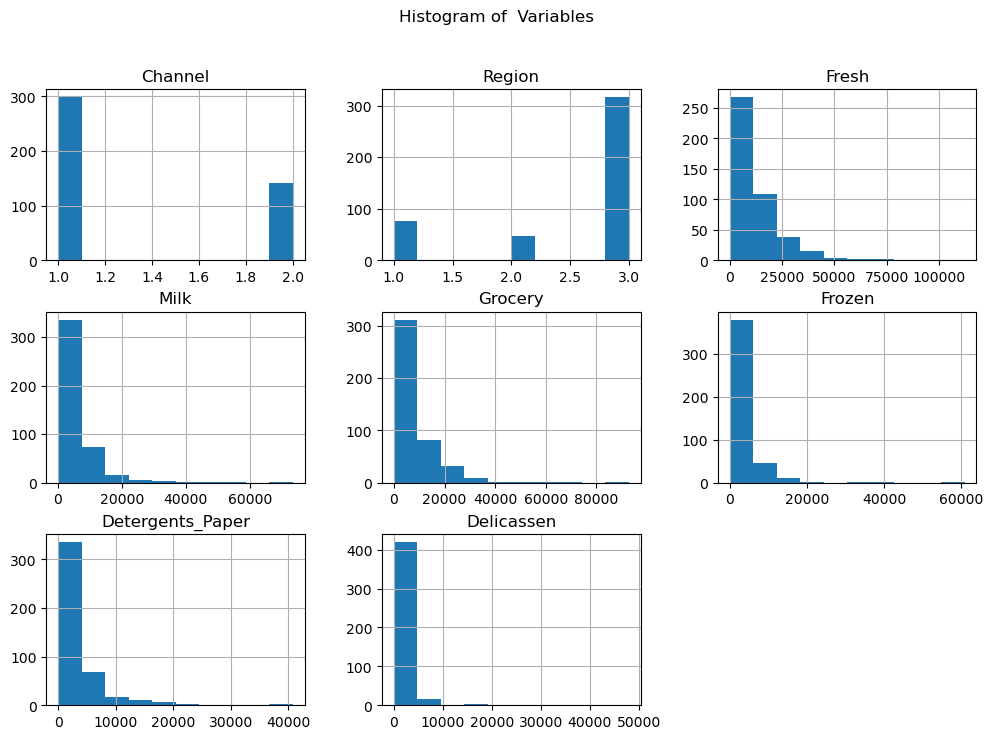

In [135]:
# Distribution of predictor variables
grocerySales_df.hist(figsize=(12, 8))
plt.suptitle("Histogram of  Variables")
plt.show()

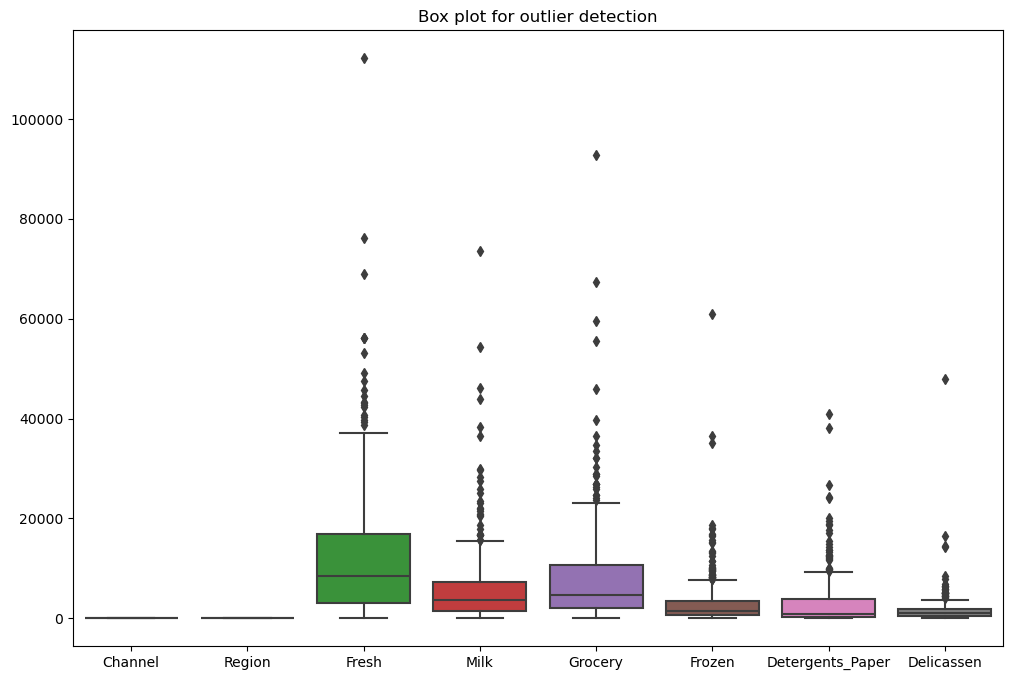

In [136]:
# Boxplot for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=grocerySales_df)
plt.title("Box plot for outlier detection")
plt.show()

In [137]:
from scipy.stats.mstats import winsorize

# Handling Outliers
for column in grocerySales_df.columns:
    grocerySales_df[column] = winsorize(grocerySales_df[column], limits=[0.05, 0.05])
grocerySales_df.describe()

/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/Users/mac/anaconda3/envs/flask_env/lib/pytho

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,11331.461364,5124.072727,7285.670455,2662.370455,2545.518182,1299.920455
std,0.468052,0.774272,10101.107913,4537.752791,6655.784209,2769.712228,3336.298486,1163.450024
min,1.000000,1.000000,403.000000,594.000000,854.000000,137.000000,64.000000,64.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,36817.000000,16784.000000,23998.000000,9927.000000,12034.000000,4478.000000


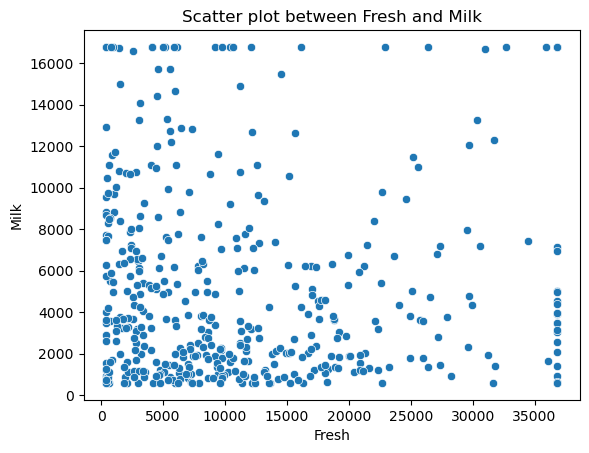

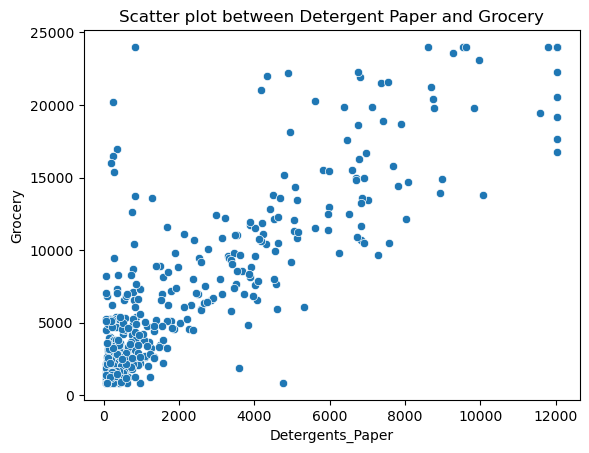

In [138]:
# Scatter plot between 'Fresh' and 'Milk'
sns.scatterplot(x='Fresh', y='Milk', data=grocerySales_df)
plt.title('Scatter plot between Fresh and Milk')
plt.show()

# Scatter plot between 'Detergents_paper' and 'Grocery'
sns.scatterplot(x='Detergents_Paper', y='Grocery', data=grocerySales_df)
plt.title('Scatter plot between Detergent Paper and Grocery')
plt.show()

In [148]:
# Correlation Analysis
correlation_matrix = grocerySales_df.corr()
print("\nCorrelation Matrix:")
correlation_matrix


Correlation Matrix:


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,HCluster
Channel,1.000000,0.062028,-0.171575,0.588392,0.718368,-0.253718,0.761818,0.162789,0.690281,0.541323
Region,0.062028,1.000000,0.056598,0.004748,0.005568,-0.037595,-0.002766,0.022356,-0.005642,-0.004931
Fresh,-0.171575,0.056598,1.000000,-0.032821,-0.097641,0.357895,-0.206387,0.258562,-0.210893,-0.674480
Milk,0.588392,0.004748,-0.032821,1.000000,0.778416,-0.019485,0.686840,0.384096,0.735275,0.367698
Grocery,0.718368,0.005568,-0.097641,0.778416,1.000000,-0.128639,0.879603,0.295619,0.820329,0.463475
Frozen,-0.253718,-0.037595,0.357895,-0.019485,-0.128639,1.000000,-0.221434,0.244281,-0.158124,-0.389792
Detergents_Paper,0.761818,-0.002766,-0.206387,0.686840,0.879603,-0.221434,1.000000,0.166750,0.816120,0.528807
Delicassen,0.162789,0.022356,0.258562,0.384096,0.295619,0.244281,0.166750,1.000000,0.277120,-0.066182
Cluster,0.690281,-0.005642,-0.210893,0.735275,0.820329,-0.158124,0.816120,0.277120,1.000000,0.501082
HCluster,0.541323,-0.004931,-0.674480,0.367698,0.463475,-0.389792,0.528807,-0.066182,0.501082,1.000000


/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

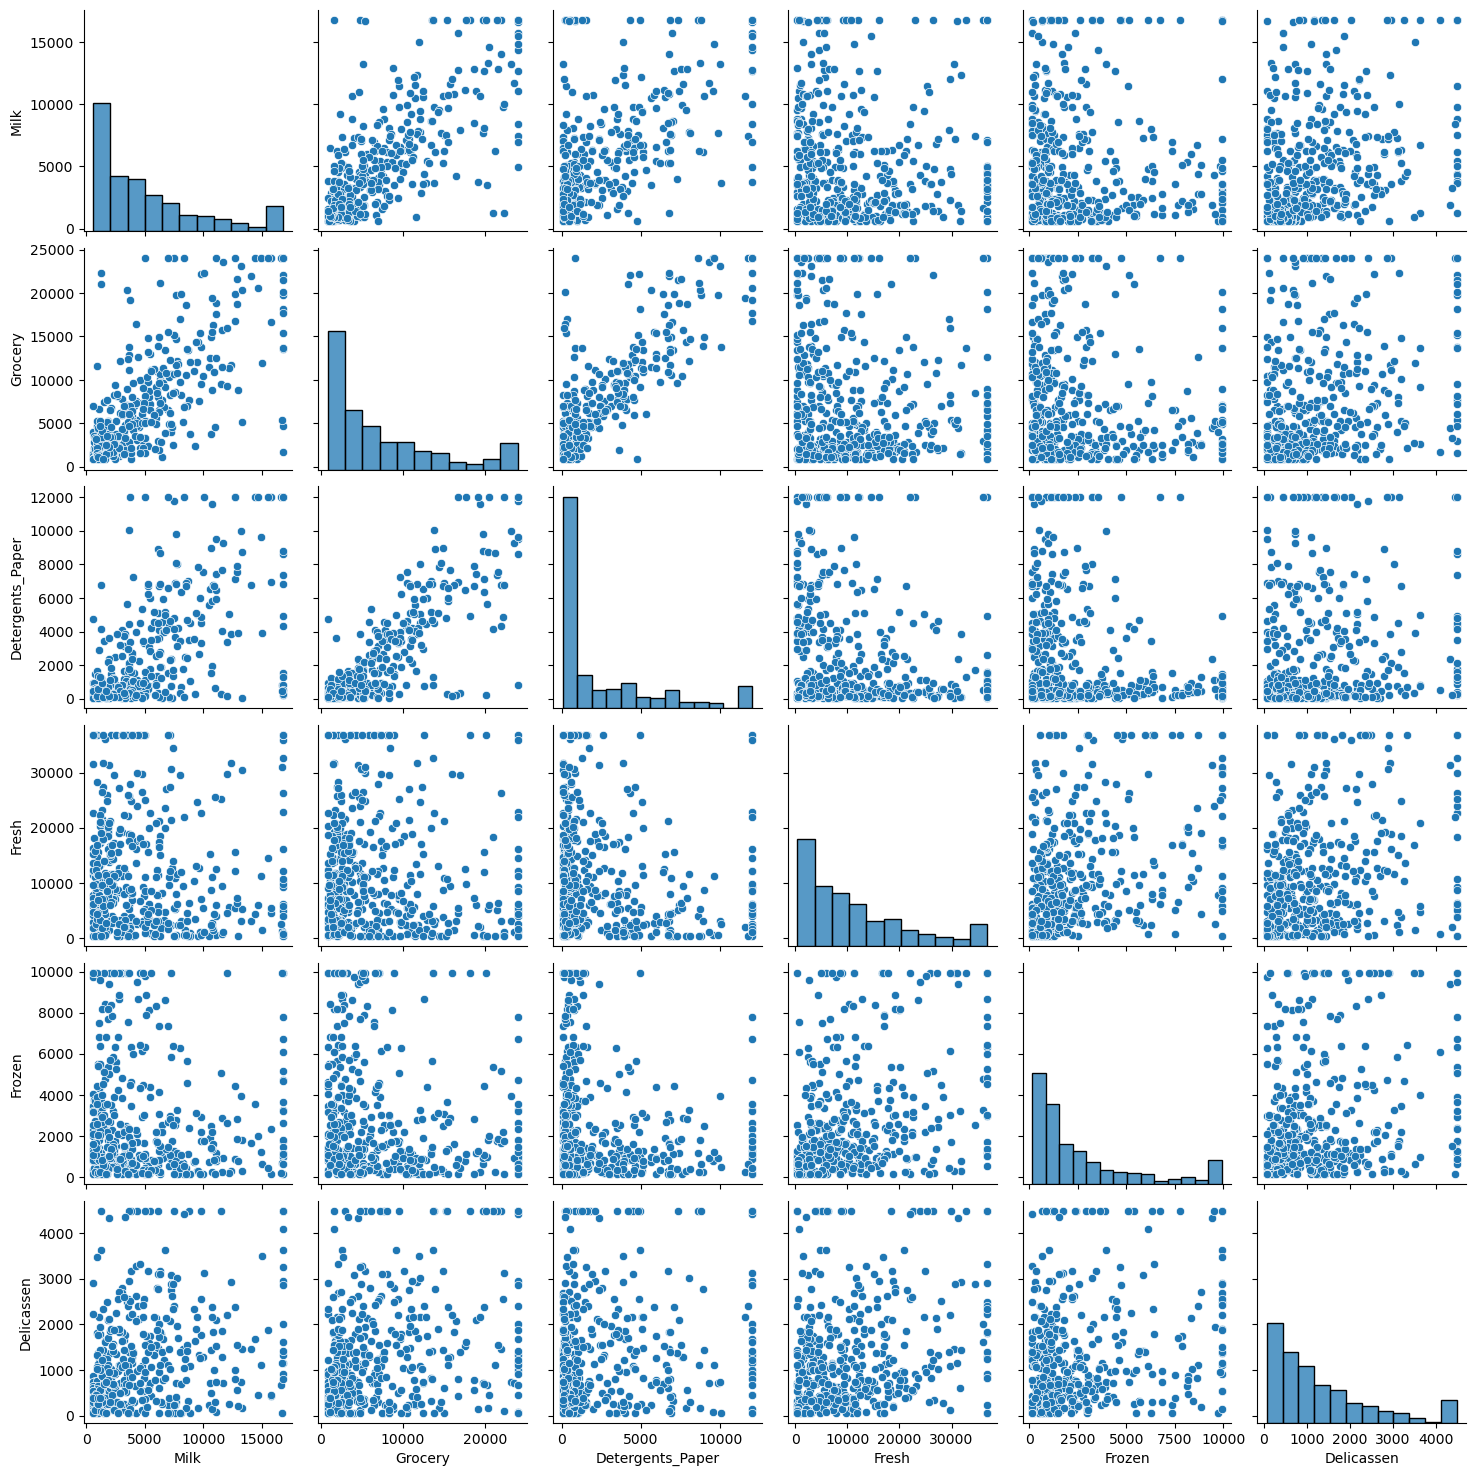

In [140]:
sns.pairplot(grocerySales_df[['Milk', 'Grocery', 'Detergents_Paper', 'Fresh', 'Frozen', 'Delicassen']])
plt.show()

In [141]:
# Separate features
X = grocerySales_df.drop(['Channel', 'Region'], axis=1)  

# Data Transformation: Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)  # Normalizing scaled data

# Feature Selection: Principal Component Analysis (PCA)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_normalized)


# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

In [142]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []
    
    for cluster in set(y_res):
      x = X[y_res == cluster,0]
      y = X[y_res == cluster,1]
      X_centroids.append(np.mean(x))
      Y_centroids.append(np.mean(y))
      
      plt.scatter(x,
                  y,
                  s=50,
                  marker='s',
                  label=f'cluster {cluster}')
        
    if plt_cluster_centers:
      plt.scatter(X_centroids,
                  Y_centroids,
                  marker='*',
                  c='red',
                  s=250,
                  label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

In [143]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_clusters = 10
best_score = -1
optimal_clusters = 2  # Default to 2 clusters if no better option found
for n_clusters in range(2, max_clusters + 1):
  kmeans = KMeans(n_clusters=n_clusters, random_state=42)
  cluster_labels = kmeans.fit_predict(X_scaled)
  silhouette_avg = silhouette_score(X_scaled, cluster_labels)
  if silhouette_avg > best_score:
    best_score = silhouette_avg
    optimal_clusters = n_clusters


# Initialize and fit KMeans with optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
y_km=kmeans.fit(X_scaled)

# Get cluster labels and centroids
cluster_labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Add cluster labels to the dataset
grocerySales_df['Cluster'] = cluster_labels

# Print cluster information
cluster_info = grocerySales_df.groupby('Cluster').mean()
cluster_info

/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: 

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,,,
0,1.134146,2.545732,12574.856707,3176.612805,4098.792683,2918.000000,956.250000,1111.731707
1,1.875000,2.535714,7690.089286,10827.348214,16618.669643,1913.741071,7199.803571,1851.044643


/Users/mac/anaconda3/envs/flask_env/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


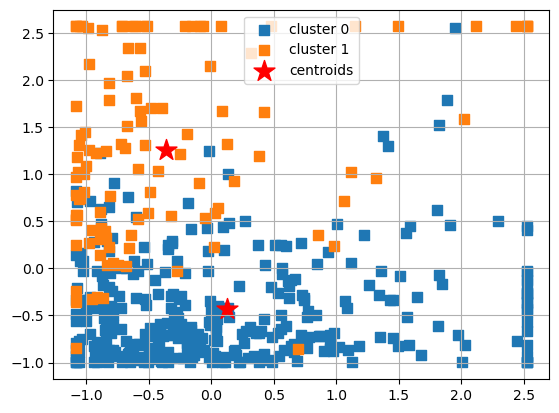

In [144]:
# # Transform data into 2 dimensions using PCA
# pca = PCA(n_components=2)
# principal_components = pca.fit_transform(X_scaled)

# # Scatter plot of the first two principal components colored by cluster
# plt.figure(figsize=(10, 6))
# plt.scatter(principal_components[:, 0], principal_components[:, 1], c=cluster_labels, cmap='viridis', alpha=0.8)
# plt.title('Clustering Visualization using PCA (3 clusters)')
# plt.colorbar(label='Cluster')
# plt.show()
#y_hc = ac.fit_predict(X)


# fit and predict
y_km = kmeans.fit_predict(X_scaled)

plot_clusters(X_scaled,y_km, plt_cluster_centers= True)


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

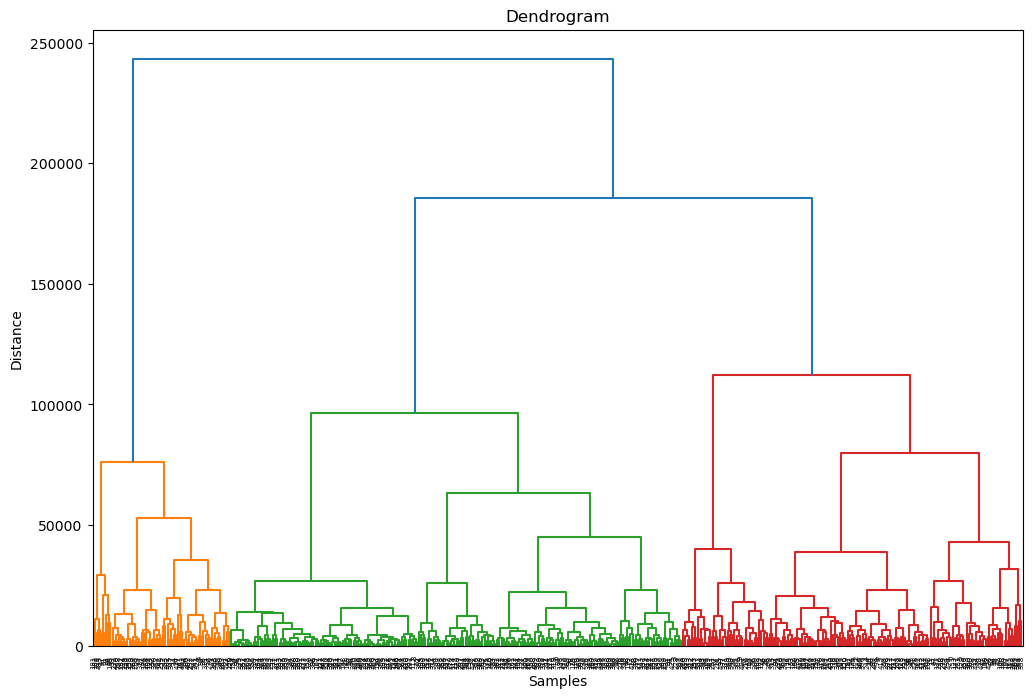

In [145]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram



# Dendrogram Visualization
plt.figure(figsize=(12, 8))
dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()


In [146]:
from scipy.cluster.hierarchy import fcluster

# From the above diagram the optimal number of clusters is 3
optimal_num_clusters = 3
clusters = fcluster(linkage(X, method='ward'), optimal_num_clusters, criterion='maxclust')

# Add cluster labels to the dataframe
grocerySales_df['HCluster'] = clusters

# Analyze the clusters
cluster_summary = grocerySales_df.groupby('HCluster').mean()

cluster_summary

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
HCluster,,,,,,,,,
1,1.215385,2.630769,30850.861538,6193.692308,7735.953846,4705.292308,1774.323077,2076.276923,0.169231
2,1.032710,2.495327,9025.813084,2135.009346,2687.210280,2934.976636,540.481308,936.257009,0.000000
3,1.751553,2.571429,6515.608696,8665.279503,13216.118012,1475.242236,5521.950311,1469.863354,0.627329


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

Explained Variance Ratio: [0.45513961 0.27020531 0.10725085 0.10351081 0.04713748 0.01675594]


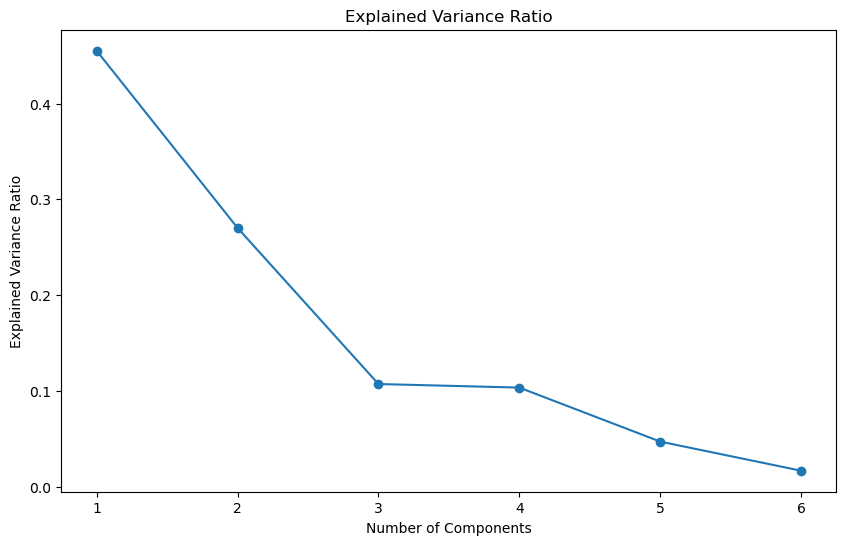

Cumulative Explained Variance: [0.45513961 0.72534492 0.83259577 0.93610658 0.98324406 1.        ]
Number of Components to Explain 95% Variance: 4


In [147]:
pca = PCA()
pca.fit(X_scaled)

# Explained Variance Ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Scree Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='-')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Cumulative Explained Variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
print("Cumulative Explained Variance:", cumulative_explained_variance)

#Number of Components  to Explain 95% Variance
num_components = len(cumulative_explained_variance[cumulative_explained_variance <= 0.95])
print("Number of Components to Explain 95% Variance:", num_components)

# PCA with Selected Number of Components
pca = PCA(n_components=num_components)
X_pca = pca.fit_transform(X_scaled)


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- **Distinct Customer Segments**: The KMeans clustering model identified three distinct customer segments based on their spending patterns. These segments could indicate high-volume retailers or supermarkets, medium-sized grocery stores or cafes, and restaurants or food service establishments specializing in fresh and frozen products. Both hierarchical clustering and K-means clustering revealed three distinct clusters or groupings of customers based on their purchasing behavior. 

- **Feature Importance**: Random Forest Regression revealed that 'Fresh', 'Milk', and 'Grocery' are the most important features in predicting customer segments. This suggests that these product categories significantly influence the differentiation between customer segments. However the cumulative explained variance indicates that there are four principal components that explain approximately 94% of the total variance in the dataset, suggesting that these components capture the most essential information.


- **Correlation Matrix and Pattern**: The correlation matrix shows moderate to strong correlations between certain product categories. The correlation matrix highlights interesting relationships between the product categories. For instance, there is a strong positive correlation between 'Grocery' and 'Detergents_Paper', suggesting that customers who purchase one of these items are likely to purchase the other as well. Understanding such correlations can aid in cross-selling strategies and product bundling.


- **Cluster Characteristics**: Each cluster identified through hierarchical clustering and K-means clustering exhibits distinct purchasing behaviors. For example, Cluster 1 in hierarchical clustering has higher average spending on 'Fresh' products compared to other clusters, while Cluster 3 has a higher focus on 'Milk', 'Grocery', and 'Detergents_Paper' products. Similarly, K-means clustering reveals differences in purchasing patterns across the three identified clusters, with each cluster showing unique preferences for certain product categories.
